In [1]:
import pandas as pd
from tabulate import tabulate

column_names = ['Class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID']

train_paths = [
    r"J:\DU archive\Term6\DM\ProjectDM\monk's\monks-1.train",
    r"J:\DU archive\Term6\DM\ProjectDM\monk's\monks-2.train",
    r"J:\DU archive\Term6\DM\ProjectDM\monk's\monks-3.train"
]

test_paths = [
    r"J:\DU archive\Term6\DM\ProjectDM\monk's\monks-1.test",
    r"J:\DU archive\Term6\DM\ProjectDM\monk's\monks-2.test",
    r"J:\DU archive\Term6\DM\ProjectDM\monk's\monks-3.test"
]

train_dfs = [
    pd.read_csv(path, sep=r'\s+', header=None, names=column_names)
    for path in train_paths
]
df_train = pd.concat(train_dfs, ignore_index=True)

test_dfs = [
    pd.read_csv(path, sep=r'\s+', header=None, names=column_names)
    for path in test_paths
]
df_test = pd.concat(test_dfs, ignore_index=True)

print(f"Train samples: {len(df_train)}")
print(f"Test samples: {len(df_test)}")
print(f"Total samples (Train + Test): {len(df_train) + len(df_test)}")

print("\n--- 5 Random Samples from Train Data ---")
print(tabulate(df_train.sample(5), headers='keys', tablefmt='grid', showindex=False))

print("\n")

print("--- 5 Random Samples from Test Data ---")
print(tabulate(df_test.sample(5), headers='keys', tablefmt='grid', showindex=False))

df_train.to_csv("train_data_full.csv", index=False)
df_test.to_csv("test_data_full.csv", index=False)

Train samples: 415
Test samples: 1296
Total samples (Train + Test): 1711

--- 5 Random Samples from Train Data ---
+---------+------+------+------+------+------+------+----------+
|   Class |   a1 |   a2 |   a3 |   a4 |   a5 |   a6 | ID       |
+=========+======+======+======+======+======+======+==========+
|       0 |    2 |    3 |    1 |    3 |    4 |    2 | data_264 |
+---------+------+------+------+------+------+------+----------+
|       1 |    2 |    2 |    1 |    1 |    2 |    1 | data_195 |
+---------+------+------+------+------+------+------+----------+
|       1 |    1 |    2 |    1 |    3 |    3 |    2 | data_70  |
+---------+------+------+------+------+------+------+----------+
|       0 |    1 |    3 |    1 |    1 |    1 |    2 | data_98  |
+---------+------+------+------+------+------+------+----------+
|       0 |    3 |    2 |    2 |    2 |    2 |    2 | data_372 |
+---------+------+------+------+------+------+------+----------+


--- 5 Random Samples from Test Data --

In [5]:
import pandas as pd
from tabulate import tabulate

data = {
    'Attribute Name': ['Class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'],
    'Attribute Type': [
        'Binary',          
        'Discrete Ordinal',  
        'Discrete Ordinal',
        'Binary',
        'Discrete Ordinal',
        'Discrete Ordinal',
        'Binary',
        'Nominal'      ],
    'Unique Values': [
        '0, 1',
        '1, 2, 3',
        '1, 2, 3',
        '1, 2',
        '1, 2, 3',
        '1, 2, 3, 4',
        '1, 2',
        'data_5,data_6...' ]
} 

df_summary = pd.DataFrame(data)

print("--- Attribute Summary Table ---")
print(tabulate(df_summary, headers='keys', tablefmt='grid', showindex=False))

--- Attribute Summary Table ---
+------------------+------------------+------------------+
| Attribute Name   | Attribute Type   | Unique Values    |
+==================+==================+==================+
| Class            | Binary           | 0, 1             |
+------------------+------------------+------------------+
| a1               | Discrete Ordinal | 1, 2, 3          |
+------------------+------------------+------------------+
| a2               | Discrete Ordinal | 1, 2, 3          |
+------------------+------------------+------------------+
| a3               | Binary           | 1, 2             |
+------------------+------------------+------------------+
| a4               | Discrete Ordinal | 1, 2, 3          |
+------------------+------------------+------------------+
| a5               | Discrete Ordinal | 1, 2, 3, 4       |
+------------------+------------------+------------------+
| a6               | Binary           | 1, 2             |
+------------------+----

In [6]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('train_data_full.csv')

summary = df.describe().T 

summary.reset_index(inplace=True)
summary.rename(columns={'index': 'Attribute'}, inplace=True)

print(tabulate(summary, headers='keys', tablefmt='grid', showindex=False))

+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| Attribute   |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
+=============+=========+==========+==========+=======+=======+=======+=======+=======+
| Class       |     415 | 0.448193 | 0.497909 |     0 |   0   |     0 |     1 |     1 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| a1          |     415 | 1.94217  | 0.814441 |     1 |   1   |     2 |     3 |     3 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| a2          |     415 | 2.0241   | 0.804214 |     1 |   1   |     2 |     3 |     3 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| a3          |     415 | 1.48675  | 0.500428 |     1 |   1   |     1 |     2 |     2 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| a4          |     415 | 2.0289

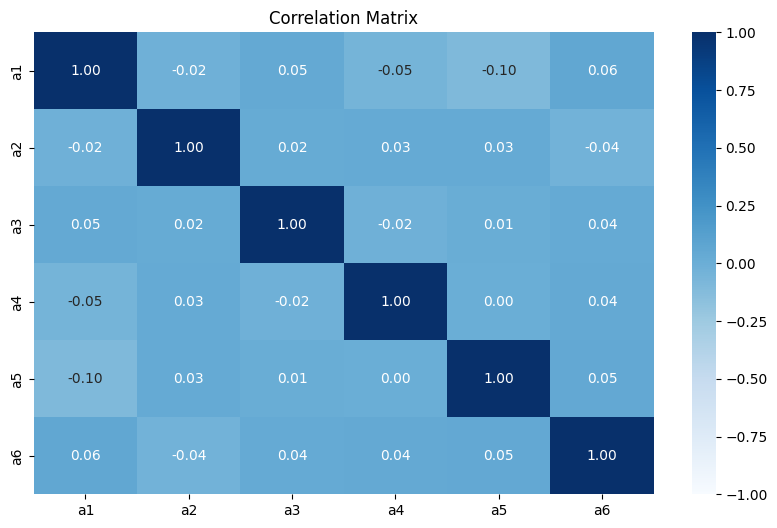

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cols = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6'] 

correlation_matrix = df[data_cols].corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

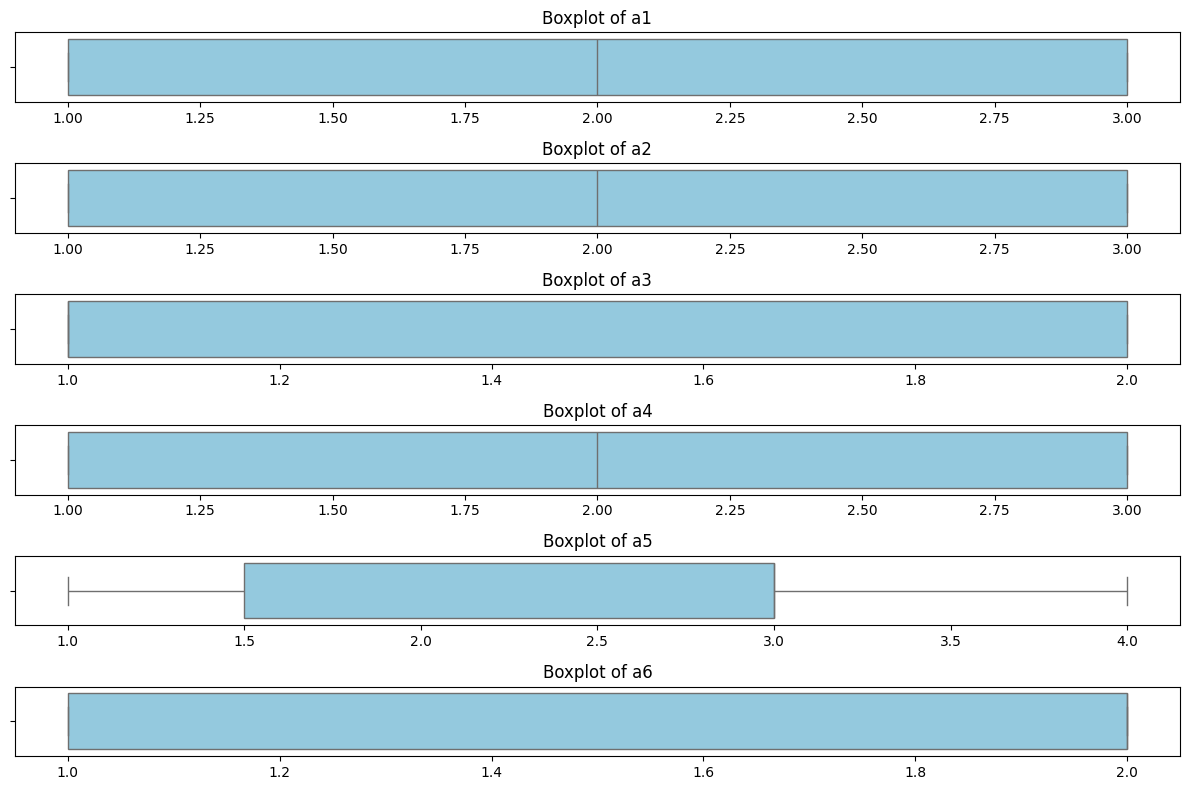

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) 
for i, col in enumerate(data_cols, 1):
    plt.subplot(len(data_cols), 1, i) 
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f'Boxplot of {col}') 
    plt.xlabel('') 
plt.tight_layout() 
plt.show()  

In [9]:
def remove_outliers_iqr(df, cols):
    df_no_outlier = df.copy()
    for col in cols:
        Q1 = df_no_outlier[col].quantile(0.25)
        Q3 = df_no_outlier[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lower_bound) & (df_no_outlier[col] <= upper_bound)]
    return df_no_outlier

df_clean = remove_outliers_iqr(df, data_cols)

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_clean.shape}")

if df.shape[0] > df_clean.shape[0]:
    print("Outliers existed and were removed.")
else:
    print("No outliers were found.")

Original data shape: (415, 8)
Cleaned data shape: (415, 8)
No outliers were found.


Initial data shape (samples, features): (415, 6)
First 5 rows of the initial data:
   a1  a2  a3  a4  a5  a6
0   1   1   1   1   3   1
1   1   1   1   1   3   2
2   1   1   1   3   2   1
3   1   1   1   3   3   2
4   1   1   2   1   2   1

Covariance matrix:
       a1     a2     a3     a4     a5     a6
a1  1.002 -0.016  0.046 -0.051 -0.096  0.062
a2 -0.016  1.002  0.025  0.032  0.032 -0.037
a3  0.046  0.025  1.002 -0.022  0.014  0.037
a4 -0.051  0.032 -0.022  1.002  0.000  0.040
a5 -0.096  0.032  0.014  0.000  1.002  0.053
a6  0.062 -0.037  0.037  0.040  0.053  1.002

Eigenvalues (unsorted):
 Eigenvalue
     0.8343
     0.9295
     1.0096
     1.0292
     1.0788
     1.1331

Eigenvectors (unsorted):
       EV1     EV2     EV3     EV4     EV5     EV6
a1  0.5664 -0.3724 -0.2133 -0.0663 -0.0969  0.6937
a2 -0.2173 -0.4745 -0.4674 -0.6472 -0.0689 -0.2926
a3 -0.0105  0.6607 -0.0038 -0.5406 -0.4588  0.2463
a4  0.3297  0.2901 -0.7246  0.3692 -0.1951 -0.3282
a5  0.5237 -0.2146  0.4578 -0.0815 -

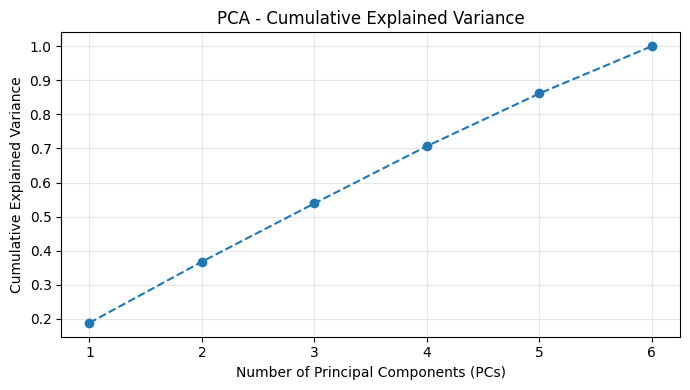


Explained variance and cumulative variance per PC:
     Explained Variance (%)  Cumulative Variance (%)
PC1                   18.84                    18.84
PC2                   17.94                    36.78
PC3                   17.11                    53.89
PC4                   16.79                    70.67
PC5                   15.45                    86.13
PC6                   13.87                   100.00

Number of principal components (PCs) to cover 80% variance: 5

Reduced data shape (samples, PCs): (415, 5)

First 5 rows of reduced data:
        PC1       PC2       PC3       PC4       PC5
0 -0.676043  1.409747  0.540258  1.992682  0.210099
1 -0.292687 -0.008323  1.293426  1.918941 -0.317632
2 -1.041667  1.372923  1.506486 -0.170919  1.104308
3 -1.086713 -0.480355  2.186561  0.166008  0.384050
4  0.245183  0.927015 -0.468179  1.574475  1.724411

Reduced data saved to 'reduced_data_PCA.csv'.

Feature weights (loadings) in principal components (PC):
      PC1    PC2    P

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

features = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']
X = df_clean[features]
print("Initial data shape (samples, features):", X.shape)
print("First 5 rows of the initial data:")
print(X.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled, rowvar=False)
cov_df = pd.DataFrame(np.round(cov_matrix, 3), index=features, columns=features)
print("\nCovariance matrix:")
print(cov_df)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
unsorted_eigen_df = pd.DataFrame({'Eigenvalue': np.round(eigenvalues, 4)})
print("\nEigenvalues (unsorted):")
print(unsorted_eigen_df.to_string(index=False))
unsorted_eigvecs_df = pd.DataFrame(np.round(eigenvectors, 4), index=features, columns=[f'EV{i+1}' for i in range(len(features))])
print("\nEigenvectors (unsorted):")
print(unsorted_eigvecs_df)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
pc_labels = [f'PC{i+1}' for i in range(len(eigenvalues))]
eigen_df = pd.DataFrame({
    'PC': pc_labels,
    'Eigenvalue': np.round(eigenvalues_sorted, 4)
})
print("\nPrincipal Component and Eigenvalue (sorted):")
print(eigen_df.to_string(index=False))
eigvecs_sorted_df = pd.DataFrame(np.round(eigenvectors_sorted, 4), index=features, columns=pc_labels)
print("\nEigenvectors (sorted):")
print(eigvecs_sorted_df)

explained_variances = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_variance = np.cumsum(explained_variances)
plt.figure(figsize=(7,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components (PCs)')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.xticks(range(1, len(features)+1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
explained_var_df = pd.DataFrame({
    'Explained Variance (%)': np.round(explained_variances * 100, 2),
    'Cumulative Variance (%)': np.round(cumulative_variance * 100, 2)
}, index=pc_labels)
print("\nExplained variance and cumulative variance per PC:")
print(explained_var_df)

threshold = 0.8
p = np.argmax(cumulative_variance >= threshold) + 1
print(f"\nNumber of principal components (PCs) to cover {int(threshold*100)}% variance: {p}")

selected_eigenvectors = eigenvectors_sorted[:, :p]
X_reduced = np.dot(X_scaled, selected_eigenvectors)
print(f"\nReduced data shape (samples, PCs): {X_reduced.shape}")
print("\nFirst 5 rows of reduced data:")
print(pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(p)]).head())

df_pca = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(p)])
df_pca['Class'] = df_clean['Class'].reset_index(drop=True)
df_pca.to_csv('reduced_data_PCA.csv', index=False)
print("\nReduced data saved to 'reduced_data_PCA.csv'.")

component_weights = pd.DataFrame(selected_eigenvectors, index=features, columns=[f'PC{i+1}' for i in range(p)])
print("\nFeature weights (loadings) in principal components (PC):")
print(np.round(component_weights, 3))